# Linear Regression
You should build a machine learning pipeline using a linear regression model. In particular, you should do the following:
- Load the `housing` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data exploration, data preprocessing, and feature engineering if necessary.
- Train and test a linear regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.

## Step 0: import the specific packages

In [16]:
import pandas as pd
import sklearn.model_selection
# import numpy as np
import sklearn.compose
import sklearn.preprocessing
# import sklearn.svm
import sklearn.metrics
import sklearn.linear_model

## Step 1: Load the .csv file

In [4]:
df = pd.read_csv('housing.csv')
df.head()

,id,price,area,bedrooms,bathrooms,stories,stories.1,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0


## Step 2: Splitting the Dataset

In [5]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

print ('df size: ', df.shape)
print ('df_train size: ', df_train.shape)
print ('df_test size: ', df_test.shape)

df size:  (545, 14)
df_train size:  (408, 14)
df_test size:  (137, 14)


# Data Preprocessing and Feature Engineering

## Step 3: Identify the implicit missing values of attributes and replace them with an explicit missing value

In [7]:
df_train.dtypes

,0
id,int64
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
stories.1,int64
guestroom,int64
basement,int64
hotwaterheating,int64


## Step 3.1: Checking for Null or NaN in the Dataset

In [8]:
df_train.isnull().sum()

,0
id,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
stories.1,0
guestroom,0
basement,0
hotwaterheating,0


In [9]:
df_train.isna().sum()

,0
id,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
stories.1,0
guestroom,0
basement,0
hotwaterheating,0


## Step 3.2: Check every column for possible implicit values

bedrooms
3    223
2    105
4     68
5      8
1      2
6      2
Name: count, dtype: int64


<Axes: xlabel='bedrooms'>

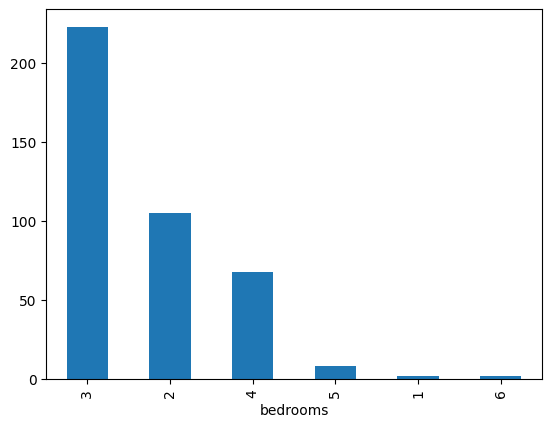

In [10]:
print (df_train['bedrooms'].value_counts())
df_train['bedrooms'].value_counts().plot(kind = 'bar')

bathrooms
1    304
2     98
3      6
Name: count, dtype: int64


<Axes: xlabel='bathrooms'>

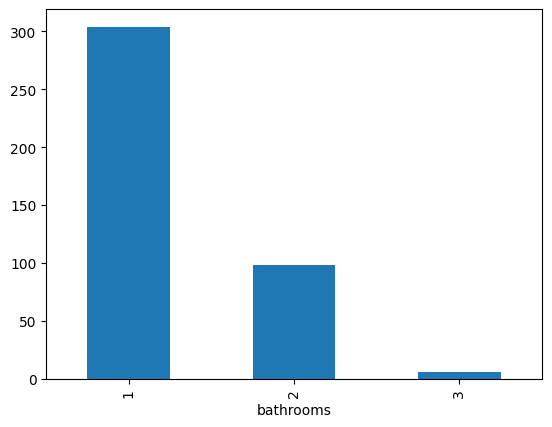

In [11]:
print (df_train['bathrooms'].value_counts())
df_train['bathrooms'].value_counts().plot(kind = 'bar')

## Try to do the same thing for all of the columns... There has to be an easier way.

## Step 4: Now we use the df_train

In [12]:
x_train = df_train.drop(['id','price'], axis = 1)
y_train = df_train['price']

x_test = df_test.drop(['id','price'], axis = 1)
y_test = df_test['price']

print ('x_train size: ', x_train.shape)
print ('y_train size: ', y_train.shape)
print ('x_test size: ', x_test.shape)
print ('y_test size: ', y_test.shape)

x_train size:  (408, 12)
y_train size:  (408,)
x_test size:  (137, 12)
y_test size:  (137,)


In [13]:
numerical_attributes = x_train.select_dtypes(include = ['int64','float64']).columns.tolist()

ct = sklearn.compose.ColumnTransformer([
    ('standard_scaling', sklearn.preprocessing.StandardScaler(), numerical_attributes)
])

ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print ('x_train size: ', x_train.shape)
print ('y_train size: ', y_train.shape)
print ('x_test size: ', x_test.shape)
print ('y_test size: ', y_test.shape)

x_train size:  (408, 12)
y_train size:  (408,)
x_test size:  (137, 12)
y_test size:  (137,)


In [14]:
# model = sklearn.svm.SVR()
model1 = sklearn.linear_model.LinearRegression() # We should use the linear regression module
model1.fit(x_train, y_train)

LinearRegression()

## Step 6: Model Assessment

In [15]:
y_predicted = model1.predict(x_test)
Mean_sq_err = sklearn.metrics.mean_squared_error(y_test, y_predicted)

print(Mean_sq_err) # Test the Mean squared error between the different models, the one who has the smallest m_s_error is better

1014979735427.2526


# TODO: Create a model while using Logistic Regression and KNN
Use the logistic_regression.ipynb found on supervised_learning